# Scikit-Learn Examples feat. Pandas and Keras

ORIGINAL SOURCE : https://github.com/raspstephan/ESS-Python-Tutorial

## [1] Basic Linear Regression with Pandas and Scikit-Learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

#### Let's look at some volcano eruption data from http://volcano.si.edu/database/

In [2]:
df = pd.read_csv("GVP_Eruption_Results.csv", header=0, encoding="ISO-8859-1")

In [3]:
# Let's a get a broad sense of the data
print('n_records:', len(df))
print('n_unique_volcanos:', len(df['Volcano Name'].unique()))
df.head()

n_records: 5160
n_unique_volcanos: 502


,Volcano Number,Volcano Name,Eruption Number,Start Year,Start Month,Latitude,Longitude
0,282090,Kirishimayama,22257,2018,3,31.934,130.862
1,352090,Sangay,22259,2018,2,-2.005,-78.341
2,267020,Karangetang,22256,2018,2,2.781,125.407
3,283120,Kusatsu-Shiranesan,22258,2018,1,36.618,138.528
4,343100,San Miguel,22251,2018,1,13.434,-88.269


#### Let's look at the number of eruptions by year. It's pretty easy to plot.

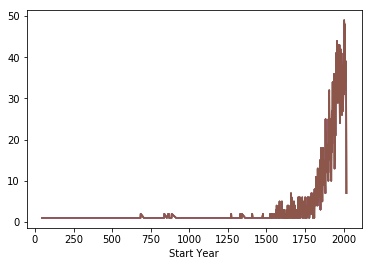

In [4]:
df.groupby('Start Year').count().plot(legend=None)

#### Hmmm... OK well it looks like volcanic eruption data just wasn't good until recently. Let's get just the last 100 years or so, and exclude this year since it's just started.

In [5]:
# Quick side-note, if we rename the columns to have no spaces, we can jupyter's convenient autocompletion feature
old_cols = df.columns
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
for i, col in enumerate(df.columns): print(old_cols[i], col, '', sep='\n')

Volcano Number
volcano_number

Volcano Name
volcano_name

Eruption Number
eruption_number

Start Year
start_year

Start Month
start_month

Latitude
latitude

Longitude
longitude



In [6]:
# Subset the data into a new dataframe
recent_df = df[(df.start_year > 1918) & (df.start_year < 2018)]
print('n_records:', len(recent_df))
print('n_unique_volcanos:', len(recent_df.volcano_name.unique()))
recent_df.head()

n_records: 3089
n_unique_volcanos: 389


,volcano_number,volcano_name,eruption_number,start_year,start_month,latitude,longitude
7,272020,Kanlaon,22249,2017,12,10.412,123.132
8,264020,Agung,22241,2017,11,-8.343,115.508
9,261230,Dempo,22248,2017,11,-4.016,103.121
10,256010,Tinakula,22239,2017,10,-10.386,165.804
11,282090,Kirishimayama,22242,2017,10,31.934,130.862


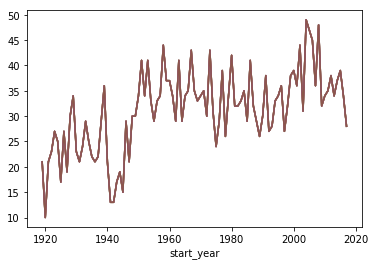

In [7]:
recent_df.groupby('start_year').count().plot(legend=None)

#### This is better, but recording data still probably improved in the 1950's. Still, let's just use this anyway for a simple linear regression to predict the next 10 years or so.

In [8]:
# Let's just make a quick dataframe that is just the years with their value counts
regdf = pd.DataFrame(recent_df.start_year.value_counts()).reset_index()
regdf.columns = ['year', 'n_eruptions']
regdf.head()

,year,n_eruptions
0,2004,49
1,2008,48
2,2005,47
3,2006,45
4,2002,44


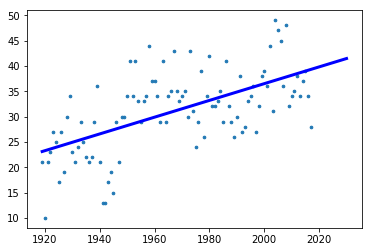

In [9]:
from sklearn import linear_model
x = regdf.year.values.reshape(-1, 1)
y = regdf.n_eruptions.values.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(x, y)
year_range = np.arange(x.min(), 2031, 1).reshape(-1, 1)

plt.scatter(x, y, s=7)
plt.plot(year_range, reg.predict(year_range), color='blue', linewidth=3)
plt.show()

## [2] Basic K-Nearest Neighbors with Pandas and Scikit-Learn

#### Let's use the basic Iris dataset to illustrate KNN. This code is based off of the KNN example at http://scikit-learn.org

In [10]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [11]:
# import iris dataset
iris = datasets.load_iris()

# let's only use the first two features, sepal length and sepal width
x = iris.data[:, :2]
y = iris.target

In [12]:
# Create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(x, y);

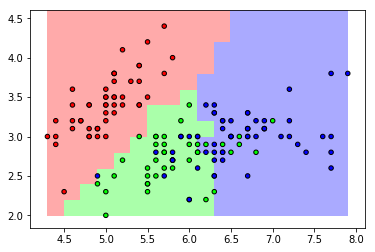

In [13]:
# Plot the decision boundary
xx, yy = np.meshgrid(np.arange(x[:, 0].min(), x[:, 0].max()+0.2, 0.2),
                     np.arange(x[:, 1].min(), x[:, 1].max()+0.2, 0.2))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.show()

## [3] Flow chart of Good Scikit-Learn Functions to Use Based on Data:

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## [4] Performing a K-Fold Cross-Validation on a Keras Neural Network

Based on code at: https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/

#### Sometimes we might want to cross-validate our neural network model.  Scikit-learn has a super convenient classes to help do exactly that.

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [15]:
# Dataset is based on health data for Pima Indian population with diabetes
dataset = np.loadtxt("pimadata.csv", delimiter=",")

# Split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [16]:
# Define your neural network model as a function
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
# Create a KerasClassifier model using your model definition function as an argument
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

In [18]:
# Evaluate your model using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)

In [19]:
# Print the results
print(f'10-fold cross validation scores:')
for result in results: print('\t', result.round(3))
print('', f'mean: {results.mean().round(3)}', sep='\n')

10-fold cross validation scores:
	 0.519
	 0.636
	 0.649
	 0.688
	 0.727
	 0.636
	 0.688
	 0.662
	 0.592
	 0.632

mean: 0.643


## [5] Keras Neural Network Hyperparameter Searching with GridSearchCV:

Based on code at: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

#### Sometimes we want to perform a hyperparameter search for our neural network.  Again to the rescue, Scikit-Learn has a class for that.

In [20]:
from sklearn.model_selection import GridSearchCV

#### Let's do a grid search for the best results for combinations of epochs and batch sizes

In [21]:
# Step 1: Define a function to create model (required for KerasClassifier)
def create_model_1():
    # create
    model = Sequential()
    # define
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #return
    return model

In [22]:
# Step 2: Create the model

# We don't include epochs and batch size during the model creation process because that's what we're searching
model_1 = KerasClassifier(build_fn=create_model_1, verbose=0)

In [23]:
# Step 3: Define the grid search parameters
param_grid_1 = dict(batch_size=[10, 40, 80], epochs=[10, 50])
print(param_grid_1)

{'batch_size': [10, 40, 80], 'epochs': [10, 50]}


In [24]:
# Step 4: Perform the grid search
grid_1 = GridSearchCV(estimator=model_1, param_grid=param_grid_1, n_jobs=1)
grid_result_1 = grid_1.fit(X, Y)

In [25]:
# Step 5: Summarize the results
def summarize_results(grid_result):
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    print('Results')
    for mean, param in zip(means, params):
        print(f'{param} -- {mean.round(3)}')
    print('')
    print(f'Best: {grid_result.best_score_.round(3)} using {grid_result.best_params_}')
summarize_results(grid_result_1)

Results
{'batch_size': 10, 'epochs': 10} -- 0.626
{'batch_size': 10, 'epochs': 50} -- 0.549
{'batch_size': 40, 'epochs': 10} -- 0.633
{'batch_size': 40, 'epochs': 50} -- 0.654
{'batch_size': 80, 'epochs': 10} -- 0.635
{'batch_size': 80, 'epochs': 50} -- 0.656

Best: 0.656 using {'batch_size': 80, 'epochs': 50}


#### OK, let's do the same thing again, but this time let's try the difference between different optimizers

In [26]:
# Step 1: Define a function to create model (required for KerasClassifier)

# This time the parameter we are searching for is in the model definition, 
# so we have to include it as an argument ("optimizer")
def create_model_2(optimizer='Adam'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [27]:
# Step 2: Create the model

# We're not searching for epoch or batch size, so we have to include values for them
model_2 = KerasClassifier(build_fn=create_model_2, epochs=2, batch_size=40, verbose=0)

In [28]:
# Step 3: Define the grid search parameters
param_grid_2 = dict(optimizer=['SGD', 'Adam', 'RMSprop'])

In [29]:
# Step 4: Perform the grid search
grid_2 = GridSearchCV(estimator=model_2, param_grid=param_grid_2, n_jobs=1)
grid_result_2 = grid_2.fit(X, Y)

In [30]:
# Step 5: Summarize the results
summarize_results(grid_result_2)

Results
{'optimizer': 'SGD'} -- 0.635
{'optimizer': 'Adam'} -- 0.579
{'optimizer': 'RMSprop'} -- 0.576

Best: 0.635 using {'optimizer': 'SGD'}


#### We can do this for pretty much any set of parameters, like weight initializations or anything else

In [31]:
# Step 1
def create_model_3(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
# Step 2
model_3 = KerasClassifier(build_fn=create_model_3, epochs=2, batch_size=40, verbose=0)

In [33]:
# Step 3
param_grid_3 = dict(init_mode=['uniform', 'normal', 'zero'])

In [34]:
# Step 4
grid_3 = GridSearchCV(estimator=model_3, param_grid=param_grid_3, n_jobs=1)
grid_result_3 = grid_3.fit(X, Y)

In [35]:
# Step 5
summarize_results(grid_result_3)

Results
{'init_mode': 'uniform'} -- 0.651
{'init_mode': 'normal'} -- 0.652
{'init_mode': 'zero'} -- 0.651

Best: 0.652 using {'init_mode': 'normal'}
